In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('D:/Downloads/Other/Data/bollywood2.csv')
df.head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1.0,18-Apr-14,2 States,LW,Romance,36.0,104.00,8576361.0,26622.0,2527.0
1,2.0,04-Jan-13,Table No. 21,N,Thriller,10.0,12.00,1087320.0,1129.0,137.0
2,3.0,18-Jul-14,Amit Sahni Ki List,N,Comedy,10.0,4.00,572336.0,586.0,54.0
3,4.0,04-Jan-13,Rajdhani Express,N,Drama,7.0,0.35,42626.0,86.0,19.0
4,5.0,04-Jul-14,Bobby Jasoos,N,Comedy,18.0,10.80,3113427.0,4512.0,1224.0
5,6.0,30-May-14,Citylights,HS,Drama,7.0,35.00,1076591.0,1806.0,84.0
6,7.0,19-Sep-14,Daawat-E-Ishq,N,Comedy,30.0,24.60,3905050.0,8315.0,1373.0
7,8.0,11-Jan-13,Matru Ki Bijlee Ka Mandola,N,Comedy,33.0,40.00,2435283.0,4326.0,647.0
8,9.0,10-Jan-14,Dedh Ishqiya,LW,Comedy,31.0,27.00,2333067.0,2436.0,591.0
9,10.0,11-Jan-13,Gangoobai,N,Drama,2.0,0.01,4354.0,1.0,1.0


In [3]:
df.describe()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


In [4]:
df.dtypes

SlNo                   float64
Release Date            object
MovieName               object
ReleaseTime             object
Genre                   object
Budget                 float64
BoxOfficeCollection    float64
YoutubeViews           float64
YoutubeLikes           float64
YoutubeDislikes        float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    float64
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    float64
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    float64
 8   YoutubeLikes         149 non-null    float64
 9   YoutubeDislikes      149 non-null    float64
dtypes: float64(6), object(4)
memory usage: 12.5+ KB


In [6]:
df.shape

(158, 10)

In [7]:
df.isnull().sum()

SlNo                   9
Release Date           9
MovieName              9
ReleaseTime            9
Genre                  9
Budget                 9
BoxOfficeCollection    9
YoutubeViews           9
YoutubeLikes           9
YoutubeDislikes        9
dtype: int64

In [8]:
df = df[:148]

In [9]:
group = df.groupby('ReleaseTime')
group.size()

ReleaseTime
FS    17
HS    17
LW    15
N     99
dtype: int64

In [10]:
group = df.groupby('Genre')
group.size()

Genre
 Drama       35
Action       20
Action        3
Comedy       36
Romance      25
Thriller     26
Thriller      3
dtype: int64

In [11]:
time = {'FS':1,'HS':2,'LW':3,'N':4}
df['ReleaseTime'] = df['ReleaseTime'].map(time)
df.head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1.0,18-Apr-14,2 States,3,Romance,36.0,104.00,8576361.0,26622.0,2527.0
1,2.0,04-Jan-13,Table No. 21,4,Thriller,10.0,12.00,1087320.0,1129.0,137.0
2,3.0,18-Jul-14,Amit Sahni Ki List,4,Comedy,10.0,4.00,572336.0,586.0,54.0
3,4.0,04-Jan-13,Rajdhani Express,4,Drama,7.0,0.35,42626.0,86.0,19.0
4,5.0,04-Jul-14,Bobby Jasoos,4,Comedy,18.0,10.80,3113427.0,4512.0,1224.0
5,6.0,30-May-14,Citylights,2,Drama,7.0,35.00,1076591.0,1806.0,84.0
6,7.0,19-Sep-14,Daawat-E-Ishq,4,Comedy,30.0,24.60,3905050.0,8315.0,1373.0
7,8.0,11-Jan-13,Matru Ki Bijlee Ka Mandola,4,Comedy,33.0,40.00,2435283.0,4326.0,647.0
8,9.0,10-Jan-14,Dedh Ishqiya,3,Comedy,31.0,27.00,2333067.0,2436.0,591.0
9,10.0,11-Jan-13,Gangoobai,4,Drama,2.0,0.01,4354.0,1.0,1.0


In [12]:
genre = {' Drama ':1,'Action':2,'Action ':2,'Comedy':3,'Romance':4,'Thriller':5,'Thriller ':5}
df['Genre'] = df['Genre'].map(genre)
df.head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1.0,18-Apr-14,2 States,3,4,36.0,104.00,8576361.0,26622.0,2527.0
1,2.0,04-Jan-13,Table No. 21,4,5,10.0,12.00,1087320.0,1129.0,137.0
2,3.0,18-Jul-14,Amit Sahni Ki List,4,3,10.0,4.00,572336.0,586.0,54.0
3,4.0,04-Jan-13,Rajdhani Express,4,1,7.0,0.35,42626.0,86.0,19.0
4,5.0,04-Jul-14,Bobby Jasoos,4,3,18.0,10.80,3113427.0,4512.0,1224.0
5,6.0,30-May-14,Citylights,2,1,7.0,35.00,1076591.0,1806.0,84.0
6,7.0,19-Sep-14,Daawat-E-Ishq,4,3,30.0,24.60,3905050.0,8315.0,1373.0
7,8.0,11-Jan-13,Matru Ki Bijlee Ka Mandola,4,3,33.0,40.00,2435283.0,4326.0,647.0
8,9.0,10-Jan-14,Dedh Ishqiya,3,3,31.0,27.00,2333067.0,2436.0,591.0
9,10.0,11-Jan-13,Gangoobai,4,1,2.0,0.01,4354.0,1.0,1.0


In [13]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [14]:
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
df['Day'] = df['Release Date'].dt.day

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SlNo                 148 non-null    float64       
 1   Release Date         148 non-null    datetime64[ns]
 2   MovieName            148 non-null    object        
 3   ReleaseTime          148 non-null    int64         
 4   Genre                148 non-null    int64         
 5   Budget               148 non-null    float64       
 6   BoxOfficeCollection  148 non-null    float64       
 7   YoutubeViews         148 non-null    float64       
 8   YoutubeLikes         148 non-null    float64       
 9   YoutubeDislikes      148 non-null    float64       
 10  Year                 148 non-null    int64         
 11  Month                148 non-null    int64         
 12  Day                  148 non-null    int64         
dtypes: datetime64[ns](1), float64(6), i

In [16]:
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year,Month,Day
0,1.0,2014-04-18,2 States,3,4,36.0,104.00,8576361.0,26622.0,2527.0,2014,4,18
1,2.0,2013-01-04,Table No. 21,4,5,10.0,12.00,1087320.0,1129.0,137.0,2013,1,4
2,3.0,2014-07-18,Amit Sahni Ki List,4,3,10.0,4.00,572336.0,586.0,54.0,2014,7,18
3,4.0,2013-01-04,Rajdhani Express,4,1,7.0,0.35,42626.0,86.0,19.0,2013,1,4
4,5.0,2014-07-04,Bobby Jasoos,4,3,18.0,10.80,3113427.0,4512.0,1224.0,2014,7,4


In [ ]:
#Data Visualization

<Axes: xlabel='ReleaseTime', ylabel='count'>

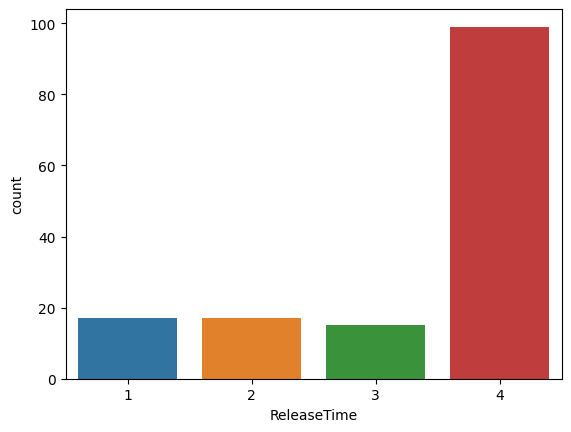

In [17]:
sns.countplot(x='ReleaseTime', data=df)

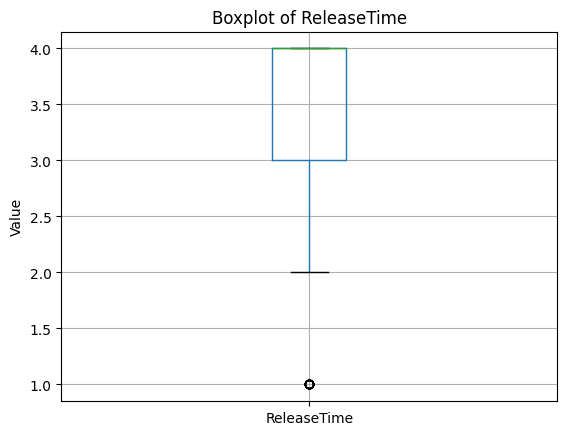

In [18]:
df.boxplot(column='ReleaseTime')
plt.title('Boxplot of ReleaseTime')
plt.ylabel('Value')
plt.show()

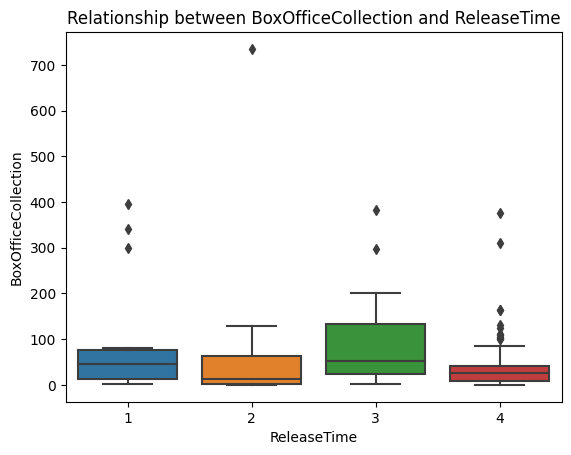

In [19]:
sns.boxplot(x='ReleaseTime', y='BoxOfficeCollection', data=df)
plt.title('Relationship between BoxOfficeCollection and ReleaseTime')
plt.xlabel('ReleaseTime')
plt.ylabel('BoxOfficeCollection')
plt.show()

<Axes: xlabel='BoxOfficeCollection', ylabel='Count'>

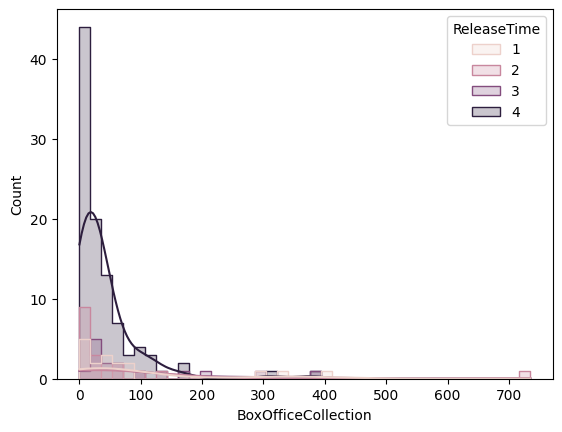

In [20]:
#Group by ReleaseTime
#compare distributions for ReleaseTime 1.0, 2.0, 3.0, 4.0
sns.histplot(data=df, x='BoxOfficeCollection', hue='ReleaseTime', kde=True, element='step')

In [21]:
#Feature engineering
df['HighReleaseTime'] = df['ReleaseTime'].apply(lambda x: 1 if x == 3 else 0)

<Axes: xlabel='Genre', ylabel='count'>

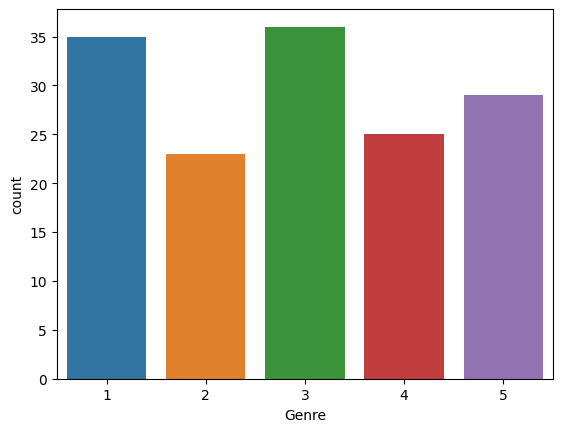

In [22]:
sns.countplot(x='Genre', data=df)

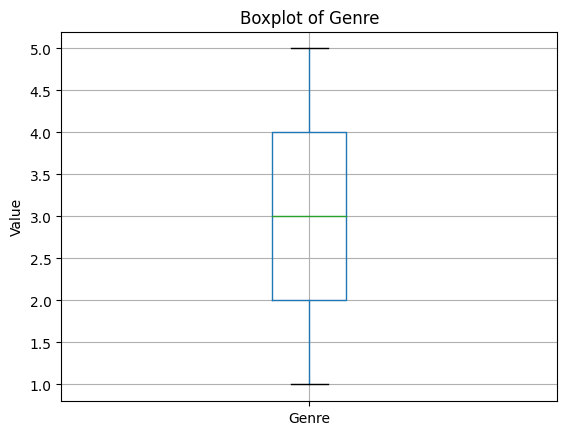

In [23]:
df.boxplot(column='Genre')
plt.title('Boxplot of Genre')
plt.ylabel('Value')
plt.show()

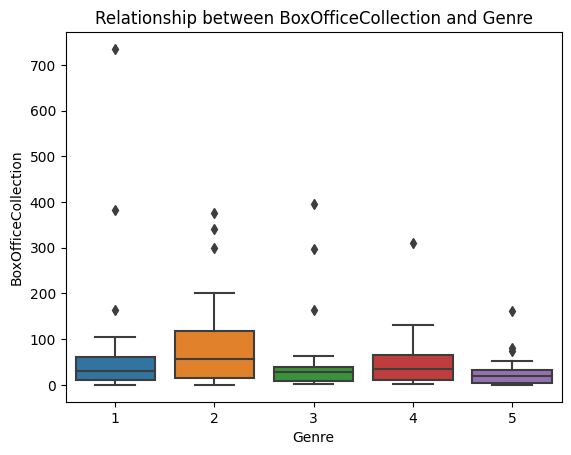

In [24]:
sns.boxplot(x='Genre', y='BoxOfficeCollection', data=df)
plt.title('Relationship between BoxOfficeCollection and Genre')
plt.xlabel('Genre')
plt.ylabel('BoxOfficeCollection')
plt.show()

<Axes: xlabel='BoxOfficeCollection', ylabel='Count'>

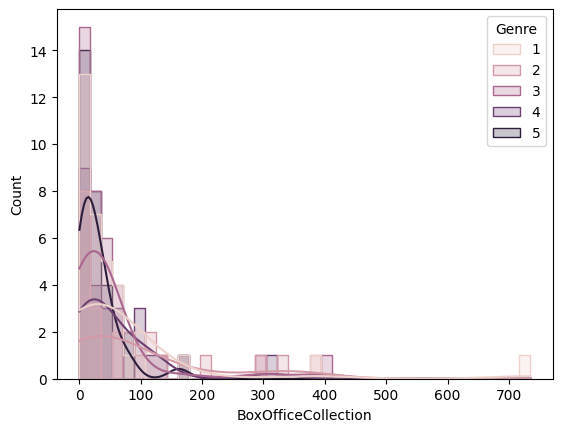

In [25]:
#Group by Genre
#compare distributions for ReleaseTime 1.0, 2.0, 3.0, 4.0, 5.0
sns.histplot(data=df, x='BoxOfficeCollection', hue='Genre', kde=True, element='step')

In [26]:
#Feature engineering
df['HighGenre'] = df['Genre'].apply(lambda x: 1 if x == 2 else 0)

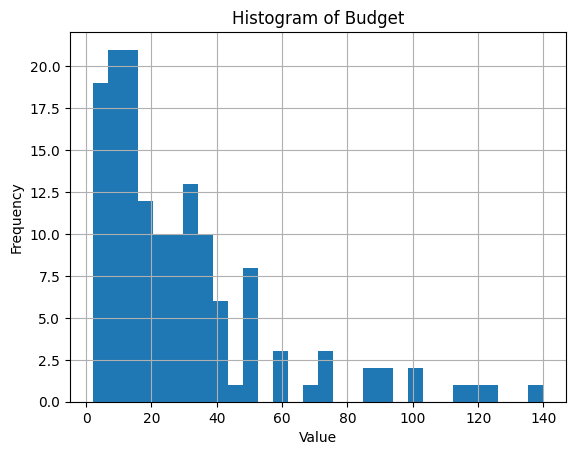

In [27]:
df['Budget'].hist(bins=30)
plt.title('Histogram of Budget')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

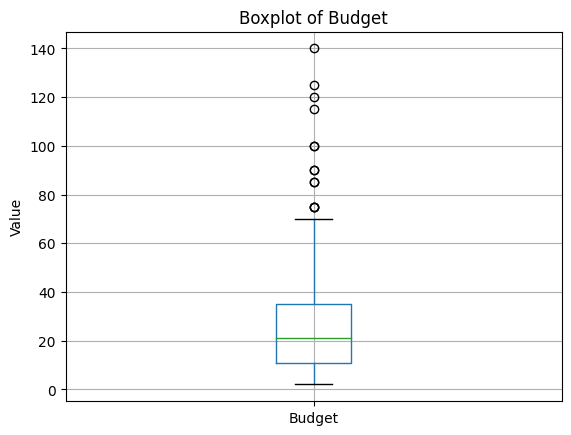

In [28]:
df.boxplot(column='Budget')
plt.title('Boxplot of Budget')
plt.ylabel('Value')
plt.show()

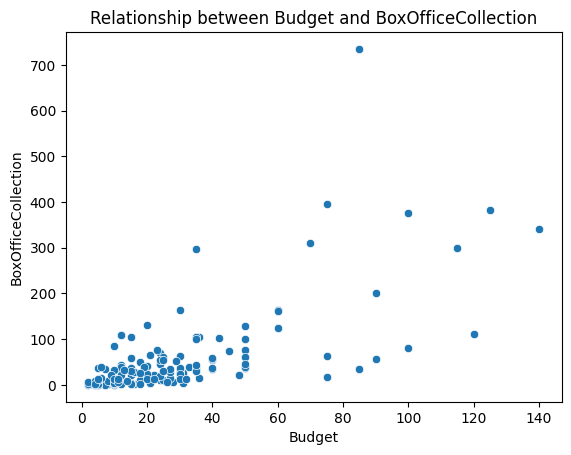

In [29]:
sns.scatterplot(x='Budget', y='BoxOfficeCollection', data=df)
plt.title('Relationship between Budget and BoxOfficeCollection')
plt.show()

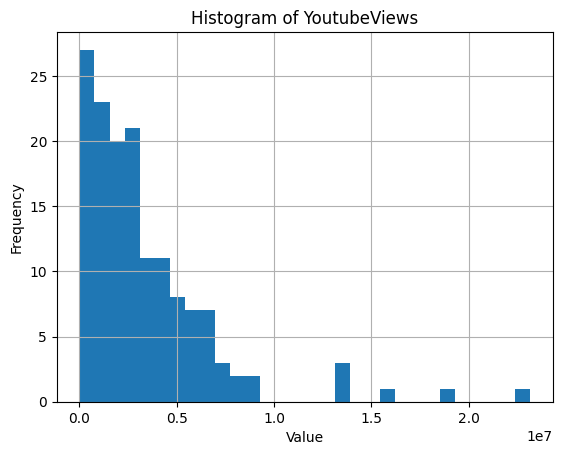

In [30]:
df['YoutubeViews'].hist(bins=30)
plt.title('Histogram of YoutubeViews')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

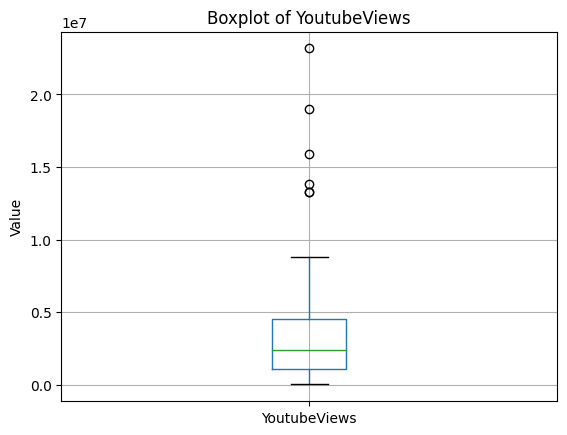

In [31]:
df.boxplot(column='YoutubeViews')
plt.title('Boxplot of YoutubeViews')
plt.ylabel('Value')
plt.show()

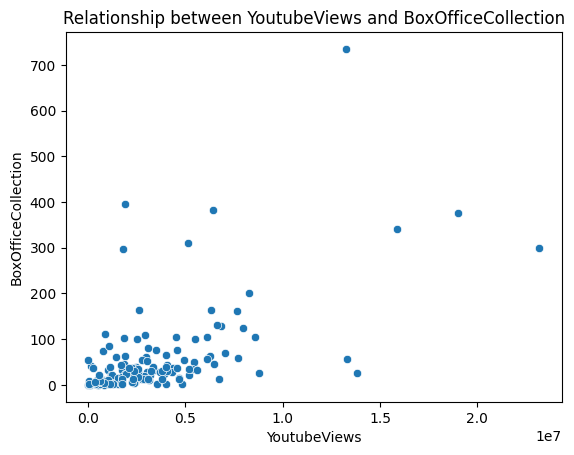

In [32]:
sns.scatterplot(x='YoutubeViews', y='BoxOfficeCollection', data=df)
plt.title('Relationship between YoutubeViews and BoxOfficeCollection')
plt.show()

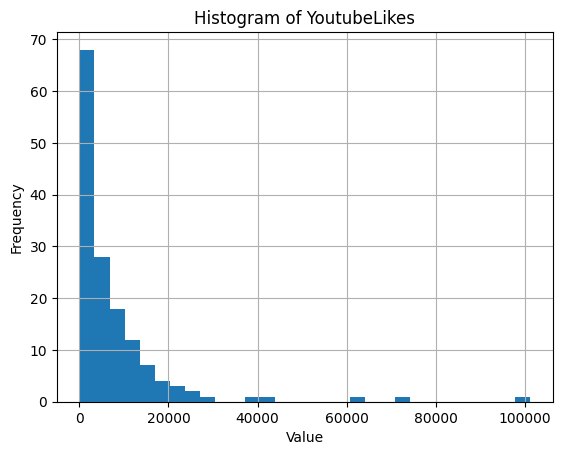

In [33]:
df['YoutubeLikes'].hist(bins=30)
plt.title('Histogram of YoutubeLikes')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

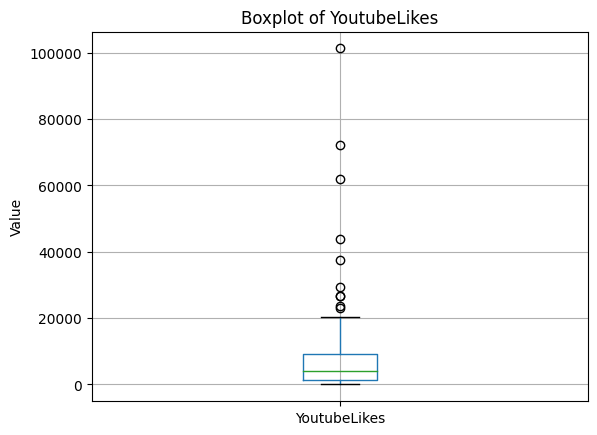

In [34]:
df.boxplot(column='YoutubeLikes')
plt.title('Boxplot of YoutubeLikes')
plt.ylabel('Value')
plt.show()

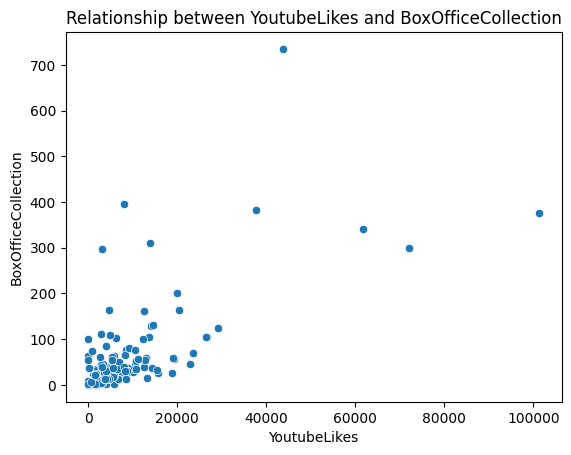

In [35]:
sns.scatterplot(x='YoutubeLikes', y='BoxOfficeCollection', data=df)
plt.title('Relationship between YoutubeLikes and BoxOfficeCollection')
plt.show()

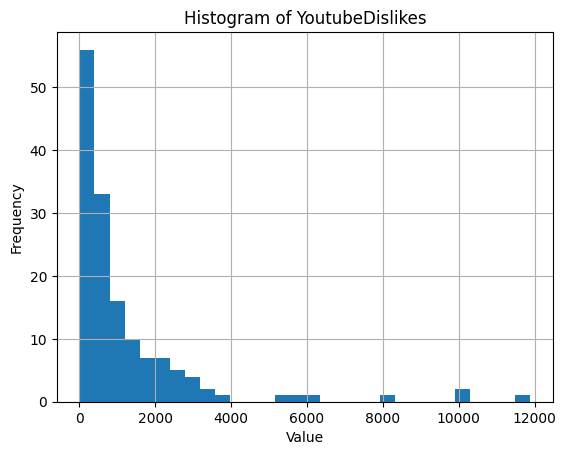

In [36]:
df['YoutubeDislikes'].hist(bins=30)
plt.title('Histogram of YoutubeDislikes')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

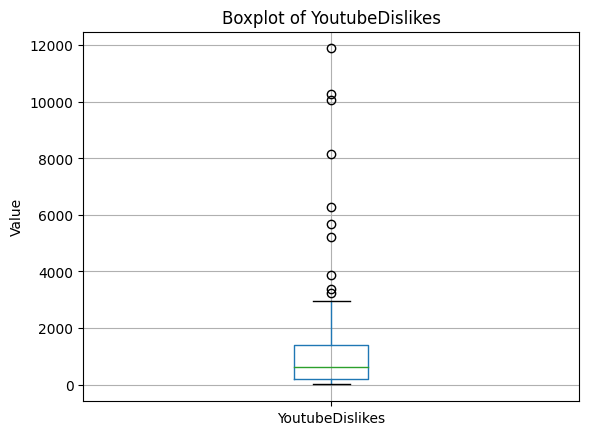

In [37]:
df.boxplot(column='YoutubeDislikes')
plt.title('Boxplot of YoutubeDislikes')
plt.ylabel('Value')
plt.show()

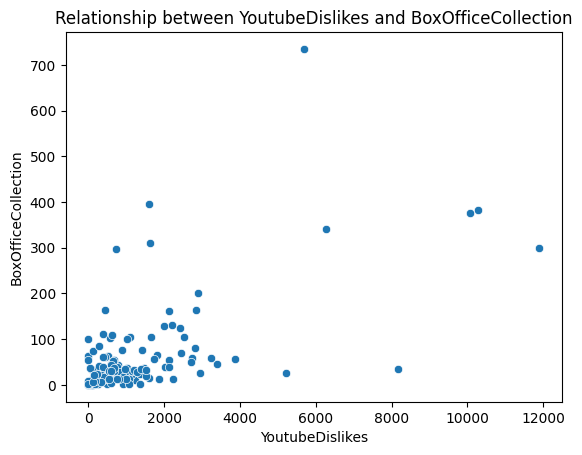

In [38]:
sns.scatterplot(x='YoutubeDislikes', y='BoxOfficeCollection', data=df)
plt.title('Relationship between YoutubeDislikes and BoxOfficeCollection')
plt.show()

<Axes: xlabel='Year', ylabel='count'>

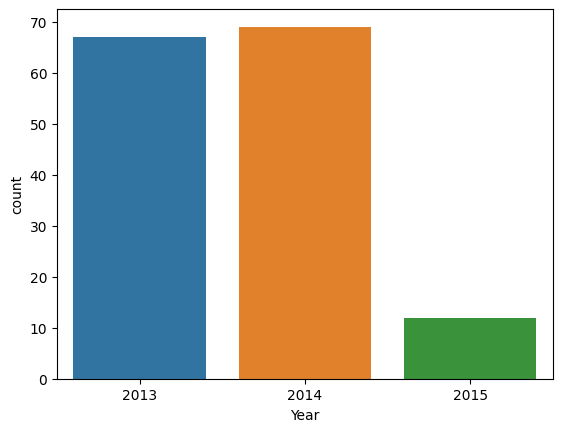

In [39]:
sns.countplot(x='Year', data=df)

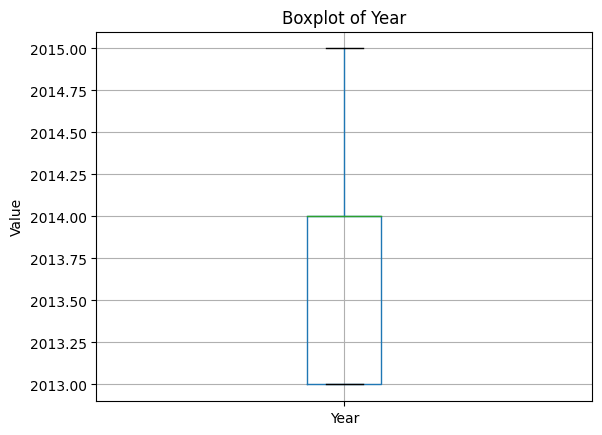

In [40]:
df.boxplot(column='Year')
plt.title('Boxplot of Year')
plt.ylabel('Value')
plt.show()

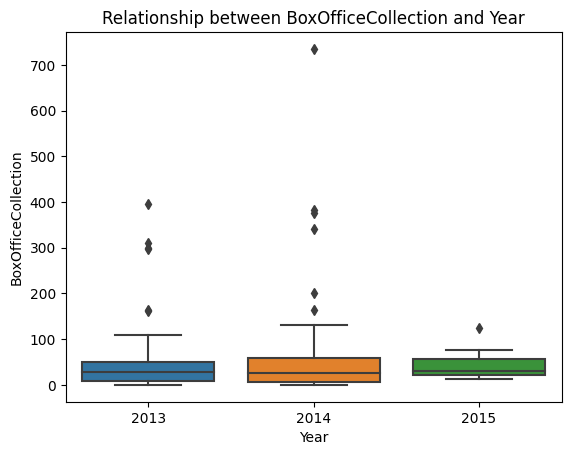

In [41]:
sns.boxplot(x='Year', y='BoxOfficeCollection', data=df)
plt.title('Relationship between BoxOfficeCollection and Year')
plt.xlabel('Year')
plt.ylabel('BoxOfficeCollection')
plt.show()

<Axes: xlabel='BoxOfficeCollection', ylabel='Count'>

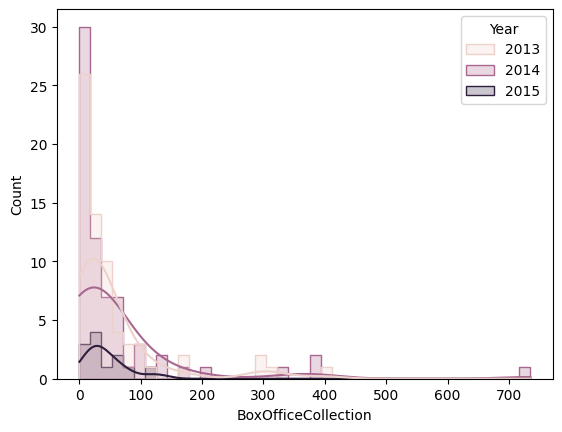

In [42]:
#Group by Year
#compare distributions for Year 
sns.histplot(data=df, x='BoxOfficeCollection', hue='Year', kde=True, element='step')

In [43]:
#Feature engineering
df['HighYear'] = df['Year'].apply(lambda x: 1 if x == 1 else 0)

<Axes: xlabel='Month', ylabel='count'>

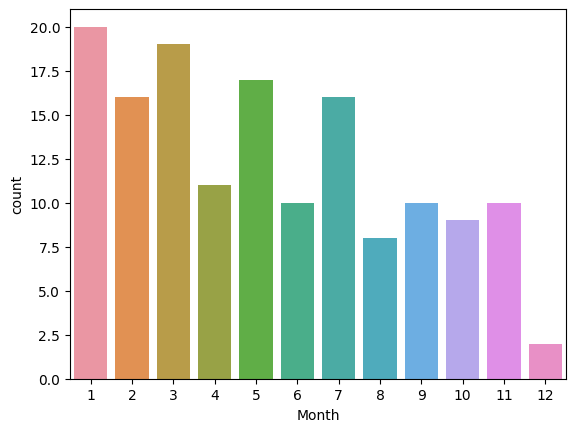

In [44]:
sns.countplot(x='Month', data=df)

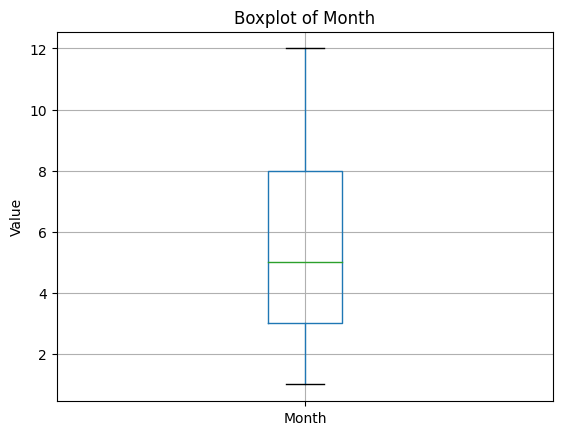

In [45]:
df.boxplot(column='Month')
plt.title('Boxplot of Month')
plt.ylabel('Value')
plt.show()

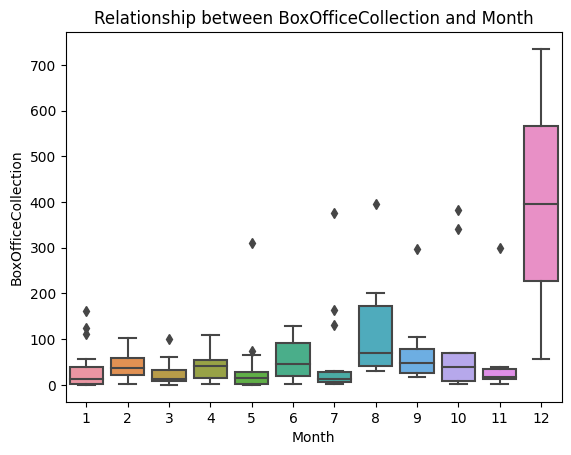

In [46]:
sns.boxplot(x='Month', y='BoxOfficeCollection', data=df)
plt.title('Relationship between BoxOfficeCollection and Month')
plt.xlabel('Month')
plt.ylabel('BoxOfficeCollection')
plt.show()

<Axes: xlabel='BoxOfficeCollection', ylabel='Count'>

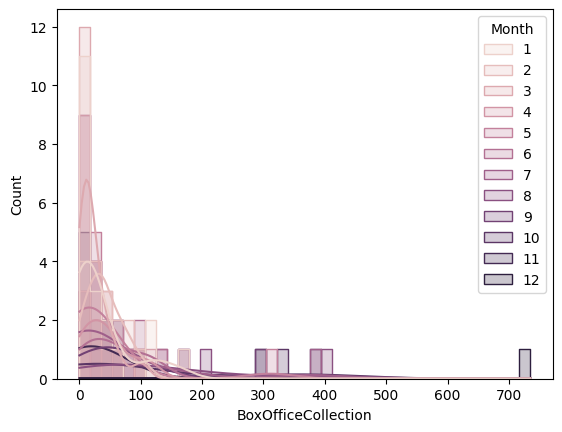

In [47]:
#Group by Year
#compare distributions for Year 
sns.histplot(data=df, x='BoxOfficeCollection', hue='Month', kde=True, element='step')

In [48]:
#Feature engineering
df['HighMonth'] = df['Month'].apply(lambda x: 1 if x == 12 else 0)

<Axes: xlabel='Day', ylabel='count'>

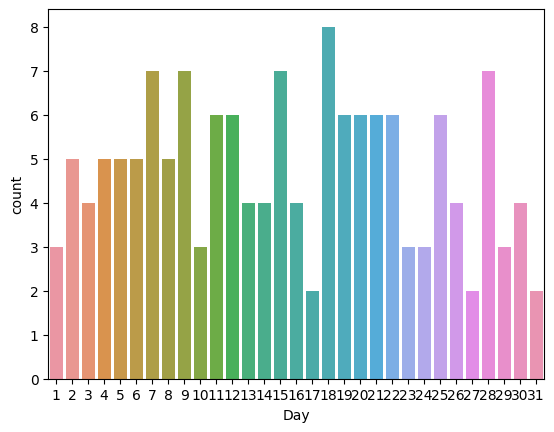

In [49]:
sns.countplot(x='Day', data=df)

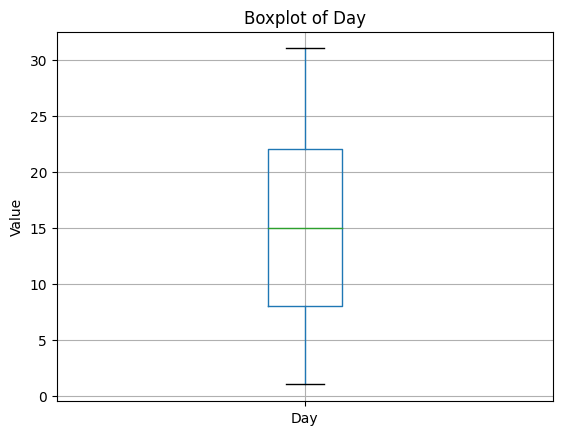

In [50]:
df.boxplot(column='Day')
plt.title('Boxplot of Day')
plt.ylabel('Value')
plt.show()

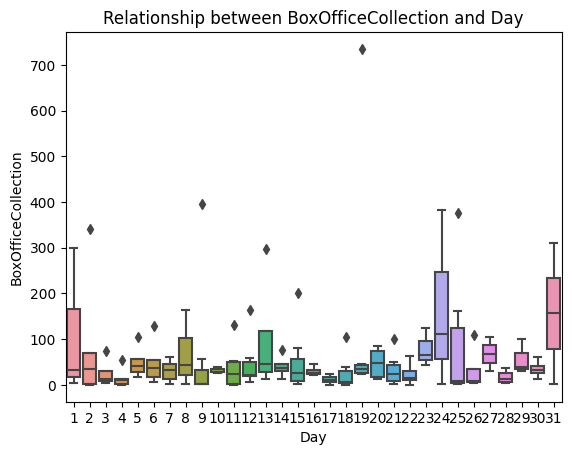

In [51]:
sns.boxplot(x='Day', y='BoxOfficeCollection', data=df)
plt.title('Relationship between BoxOfficeCollection and Day')
plt.xlabel('Day')
plt.ylabel('BoxOfficeCollection')
plt.show()

<Axes: xlabel='BoxOfficeCollection', ylabel='Count'>

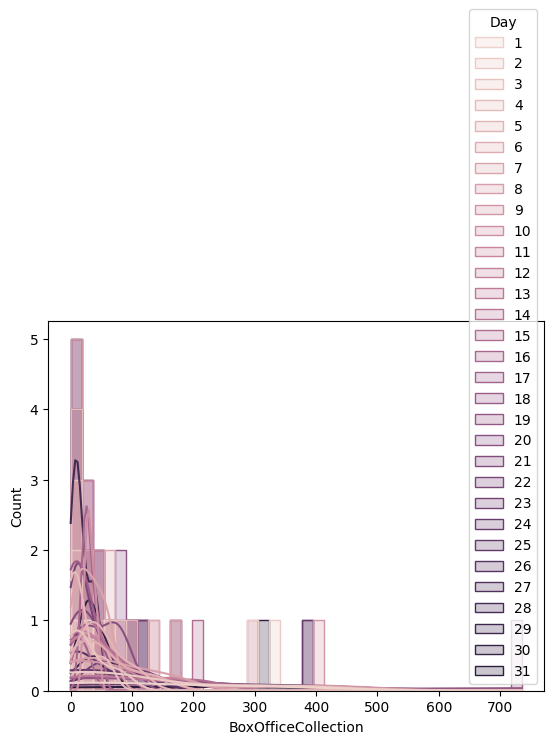

In [52]:
#Group by Year
#compare distributions for Year 
sns.histplot(data=df, x='BoxOfficeCollection', hue='Day', kde=True, element='step')

In [53]:
#Feature engineering
df['HighDay'] = df['Day'].apply(lambda x: 1 if x == 31 else 0)

In [ ]:
#Implementing the model stacking in ensemble learning approach

In [54]:
X = df[["Budget"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 3874.90
R² Score: 0.47
Root Mean Squared Error: 62.25
Mean Absolute Error: 34.11


In [55]:
X = df[["ReleaseTime"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 4416.76
R² Score: 0.02
Root Mean Squared Error: 66.46
Mean Absolute Error: 50.44


In [56]:
X = df[["Genre"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 4851.47
R² Score: -0.07
Root Mean Squared Error: 69.65
Mean Absolute Error: 50.37


In [57]:
X = df[["YoutubeViews"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1553.35
R² Score: 0.66
Root Mean Squared Error: 39.41
Mean Absolute Error: 29.59


In [58]:
X = df[["YoutubeLikes"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 958.98
R² Score: 0.79
Root Mean Squared Error: 30.97
Mean Absolute Error: 23.96


In [59]:
X = df[["YoutubeDislikes"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1292.25
R² Score: 0.71
Root Mean Squared Error: 35.95
Mean Absolute Error: 27.40


In [60]:
X = df[["Year"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 5131.93
R² Score: -0.14
Root Mean Squared Error: 71.64
Mean Absolute Error: 53.36


In [61]:
X = df[["Month"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 4082.17
R² Score: 0.10
Root Mean Squared Error: 63.89
Mean Absolute Error: 46.87


In [62]:
X = df[["Day"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 5704.06
R² Score: -0.26
Root Mean Squared Error: 75.53
Mean Absolute Error: 53.48


In [63]:
X = df[["HighReleaseTime"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 4940.32
R² Score: -0.09
Root Mean Squared Error: 70.29
Mean Absolute Error: 49.67


In [64]:
X = df[["HighGenre"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 4666.05
R² Score: -0.03
Root Mean Squared Error: 68.31
Mean Absolute Error: 52.73


In [65]:
X = df[["HighMonth"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 4806.02
R² Score: -0.06
Root Mean Squared Error: 69.33
Mean Absolute Error: 48.56


In [66]:
X = df[["HighDay"]]
y = df["BoxOfficeCollection"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 7006.66
R² Score: -0.55
Root Mean Squared Error: 83.71
Mean Absolute Error: 56.82


In [ ]:
#Model selection based on top performing models after running baseline models and recording top
#performers and combining high performing models

In [67]:
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Year,Month,Day,HighReleaseTime,HighGenre,HighYear,HighMonth,HighDay
0,1.0,2014-04-18,2 States,3,4,36.0,104.00,8576361.0,26622.0,2527.0,2014,4,18,1,0,0,0,0
1,2.0,2013-01-04,Table No. 21,4,5,10.0,12.00,1087320.0,1129.0,137.0,2013,1,4,0,0,0,0,0
2,3.0,2014-07-18,Amit Sahni Ki List,4,3,10.0,4.00,572336.0,586.0,54.0,2014,7,18,0,0,0,0,0
3,4.0,2013-01-04,Rajdhani Express,4,1,7.0,0.35,42626.0,86.0,19.0,2013,1,4,0,0,0,0,0
4,5.0,2014-07-04,Bobby Jasoos,4,3,18.0,10.80,3113427.0,4512.0,1224.0,2014,7,4,0,0,0,0,0


In [68]:
X = df[['Budget','YoutubeViews']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 2071.44
R² Score: 0.54
Root Mean Squared Error: 45.51
Mean Absolute Error: 30.69


In [69]:
X = df[['Budget','YoutubeLikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1625.03
R² Score: 0.64
Root Mean Squared Error: 40.31
Mean Absolute Error: 26.32


In [70]:
X = df[['Budget','YoutubeDislikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1745.04
R² Score: 0.61
Root Mean Squared Error: 41.77
Mean Absolute Error: 26.92


In [71]:
X = df[['YoutubeViews','YoutubeLikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 936.28
R² Score: 0.79
Root Mean Squared Error: 30.60
Mean Absolute Error: 24.01


In [72]:
X = df[['YoutubeViews','YoutubeDislikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1332.86
R² Score: 0.70
Root Mean Squared Error: 36.51
Mean Absolute Error: 25.96


In [73]:
X = df[['YoutubeLikes','YoutubeDislikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1041.13
R² Score: 0.77
Root Mean Squared Error: 32.27
Mean Absolute Error: 23.21


In [74]:
X = df[['Budget','YoutubeViews','YoutubeLikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1514.79
R² Score: 0.66
Root Mean Squared Error: 38.92
Mean Absolute Error: 25.27


In [75]:
X = df[['Budget','YoutubeViews','YoutubeDislikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1916.98
R² Score: 0.58
Root Mean Squared Error: 43.78
Mean Absolute Error: 29.28


In [76]:
X = df[['YoutubeViews','YoutubeLikes','YoutubeDislikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 978.91
R² Score: 0.78
Root Mean Squared Error: 31.29
Mean Absolute Error: 23.54


In [77]:
X = df[['Budget','YoutubeViews','YoutubeLikes','YoutubeDislikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1595.12
R² Score: 0.65
Root Mean Squared Error: 39.94
Mean Absolute Error: 26.12


In [78]:
X = df[['YoutubeViews','YoutubeLikes','Month']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 883.99
R² Score: 0.80
Root Mean Squared Error: 29.73
Mean Absolute Error: 23.08


In [79]:
X = df[['YoutubeViews','YoutubeLikes','ReleaseTime']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1021.05
R² Score: 0.77
Root Mean Squared Error: 31.95
Mean Absolute Error: 24.03


In [80]:
X = df[['YoutubeViews','YoutubeLikes','Month','ReleaseTime']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 998.76
R² Score: 0.78
Root Mean Squared Error: 31.60
Mean Absolute Error: 23.77


In [81]:
X = df[['YoutubeViews','YoutubeDislikes','Month']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1259.79
R² Score: 0.72
Root Mean Squared Error: 35.49
Mean Absolute Error: 25.64


In [82]:
X = df[['YoutubeViews','YoutubeDislikes','ReleaseTime']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1394.02
R² Score: 0.69
Root Mean Squared Error: 37.34
Mean Absolute Error: 25.74


In [83]:
X = df[['YoutubeLikes','YoutubeDislikes','Month']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 975.61
R² Score: 0.78
Root Mean Squared Error: 31.23
Mean Absolute Error: 22.60


In [84]:
X = df[['YoutubeViews','YoutubeLikes','YoutubeDislikes','Month']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 917.92
R² Score: 0.80
Root Mean Squared Error: 30.30
Mean Absolute Error: 22.92


In [ ]:
#Implementing the stacking approach

In [93]:
X = df[['Budget','YoutubeViews']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
dt = DecisionTreeRegressor(max_depth=5, random_state=44)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 7152.54
R² Score: 0.03
Root Mean Squared Error: 84.57
Mean Absolute Error: 40.59


In [94]:
X = df[['Budget','YoutubeLikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
dt = DecisionTreeRegressor(max_depth=5, random_state=44)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 8096.14
R² Score: -0.10
Root Mean Squared Error: 89.98
Mean Absolute Error: 45.37


In [95]:
X = df[['YoutubeViews','YoutubeLikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
dt = DecisionTreeRegressor(max_depth=5, random_state=44)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 3886.00
R² Score: 0.47
Root Mean Squared Error: 62.34
Mean Absolute Error: 30.60


In [96]:
X = df[['YoutubeViews','YoutubeLikes','Month']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
dt = DecisionTreeRegressor(max_depth=5, random_state=44)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 4335.74
R² Score: 0.41
Root Mean Squared Error: 65.85
Mean Absolute Error: 34.72


In [97]:
X = df[['YoutubeViews','YoutubeLikes','YoutubeDislikes','Month']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
dt = DecisionTreeRegressor(max_depth=5, random_state=44)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 5284.90
R² Score: 0.28
Root Mean Squared Error: 72.70
Mean Absolute Error: 40.87


In [98]:
X = df[['YoutubeViews','YoutubeLikes']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
rf = RandomForestRegressor(n_estimators=100, random_state=44)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 3759.44
R² Score: 0.49
Root Mean Squared Error: 61.31
Mean Absolute Error: 31.16


In [99]:
X = df[['YoutubeViews','YoutubeLikes','Month']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
rf = RandomForestRegressor(n_estimators=100, random_state=44)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 3607.44
R² Score: 0.51
Root Mean Squared Error: 60.06
Mean Absolute Error: 31.78


In [100]:
X = df[['YoutubeViews','YoutubeLikes','YoutubeDislikes','Month']]
y = df['BoxOfficeCollection']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
rf = RandomForestRegressor(n_estimators=100, random_state=44)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 3914.98
R² Score: 0.47
Root Mean Squared Error: 62.57
Mean Absolute Error: 35.58
